In [14]:
#@title Everything in Part 1 copied over

!pip install -U -q PyDrive
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import defaultdict

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.utils import plot_model

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

stockData = drive.CreateFile({'id':"1Gtf_20aW4H81JRwjvdKozlF49sXpZzID"}) 
stockData.GetContentFile('stock_data.csv')
cleaned_data = pd.read_csv('stock_data.csv')
cleaned_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Text,Sentiment
0,kicker on my watchlist xide tit soq pnk cpw bp...,1
1,user aap movie return for the fea geed indicat...,1
2,user i d be afraid to short amzn they are look...,1
3,mnta over,1
4,oi over,1


In [15]:
X = cleaned_data['Text']
y = cleaned_data['Sentiment']

vec = CountVectorizer(max_features=4000)
X = vec.fit_transform(X).toarray()

pca = PCA(n_components=256)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h1 align="center">Naive Bayes Classifier</h1>

<img src="https://editor.analyticsvidhya.com/uploads/23385Capture6.PNG" align="left">

The main idea of Naive Bayes is that we assume that for every single word in a sentence, it has a certain probability of appearing given the tone of the entire sentence. Hence, combining those probabilities together, we can assign probabilities of a sentence being positive or negative.


In [16]:
model = BernoulliNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Naive Bayes Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Naive Bayes Accuracy: 0.6954270923209663


Here, we test alpha again, which has appeared multiple times in previous models.

In [17]:
alphas = np.linspace(0.01,2,200)
res = []

for i in alphas:
  model = BernoulliNB(alpha=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  res.append(accuracy_score(y_test,y_pred))


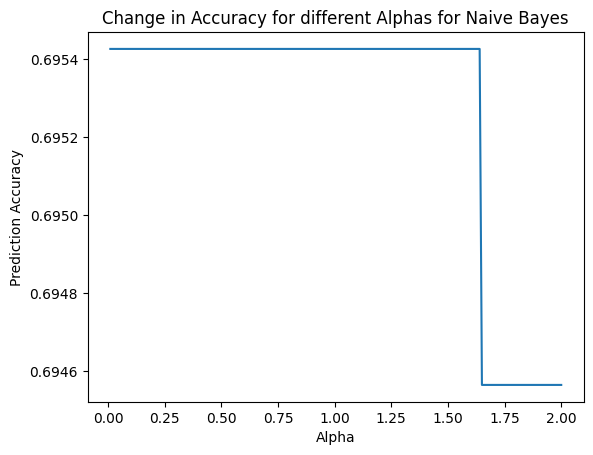

In [18]:
'''
Plotting the error over the different alphas
'''
plt.title('Change in Accuracy for different Alphas for Naive Bayes')
plt.xlabel('Alpha')
plt.ylabel('Prediction Accuracy')
 
plt.plot(alphas,res)

Very interesting. I guess this tells us that as long as alpha is a relatively normal value, the accuracy doesn't change, so we can leave the default settings as it is.